# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# link to dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df.drop(columns=['id'], inplace=True)

In [4]:
df.shape

(5110, 11)

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# drop all null values
df = df.dropna().reset_index(drop=True)
df.shape

(4909, 11)

In [7]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# define variables
numeric = ['age', 'avg_glucose_level', 'bmi']
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
target = ['stroke']

In [9]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4909.000000   4909.000000    4909.000000        4909.000000   
mean     42.865374      0.091872       0.049501         105.305150   
std      22.555115      0.288875       0.216934          44.424341   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.070000   
50%      44.000000      0.000000       0.000000          91.680000   
75%      60.000000      0.000000       0.000000         113.570000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  4909.000000  
mean     28.893237     0.042575  
std       7.854067     0.201917  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

In [10]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [11]:
df.hypertension.value_counts()

0    4458
1     451
Name: hypertension, dtype: int64

In [12]:
df.heart_disease.value_counts()

0    4666
1     243
Name: heart_disease, dtype: int64

In [13]:
df.ever_married.value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [14]:
df.work_type.value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [15]:
df.Residence_type.value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [16]:
df.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [17]:
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

# Univariate Analysis

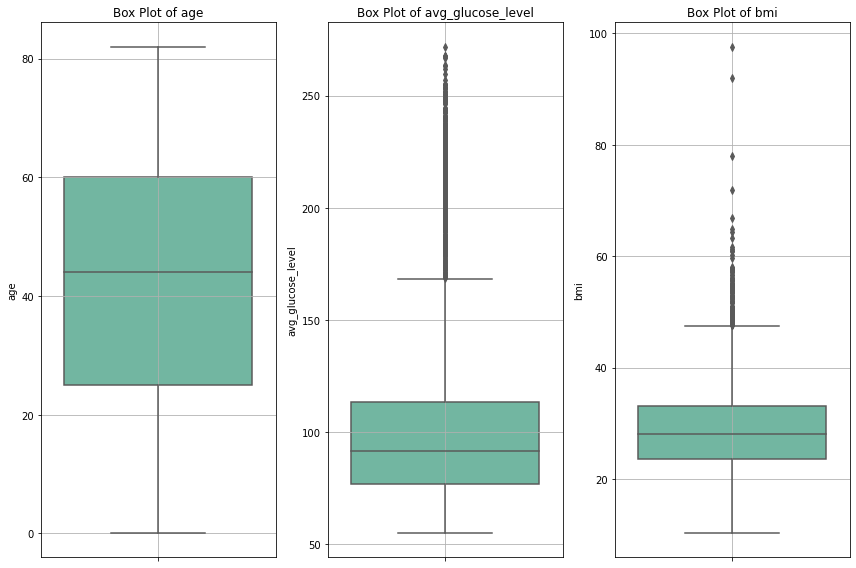

In [18]:
# Box plot for numeric variables

plt.figure(figsize=(12, 8))

for i, var in enumerate(numeric, 1):
    plt.subplot(1, len(numeric), i)
    sns.boxplot(y=var, data=df, palette="Set2")
    plt.title(f"Box Plot of {var}")
    plt.grid()
    
plt.tight_layout()
plt.show()

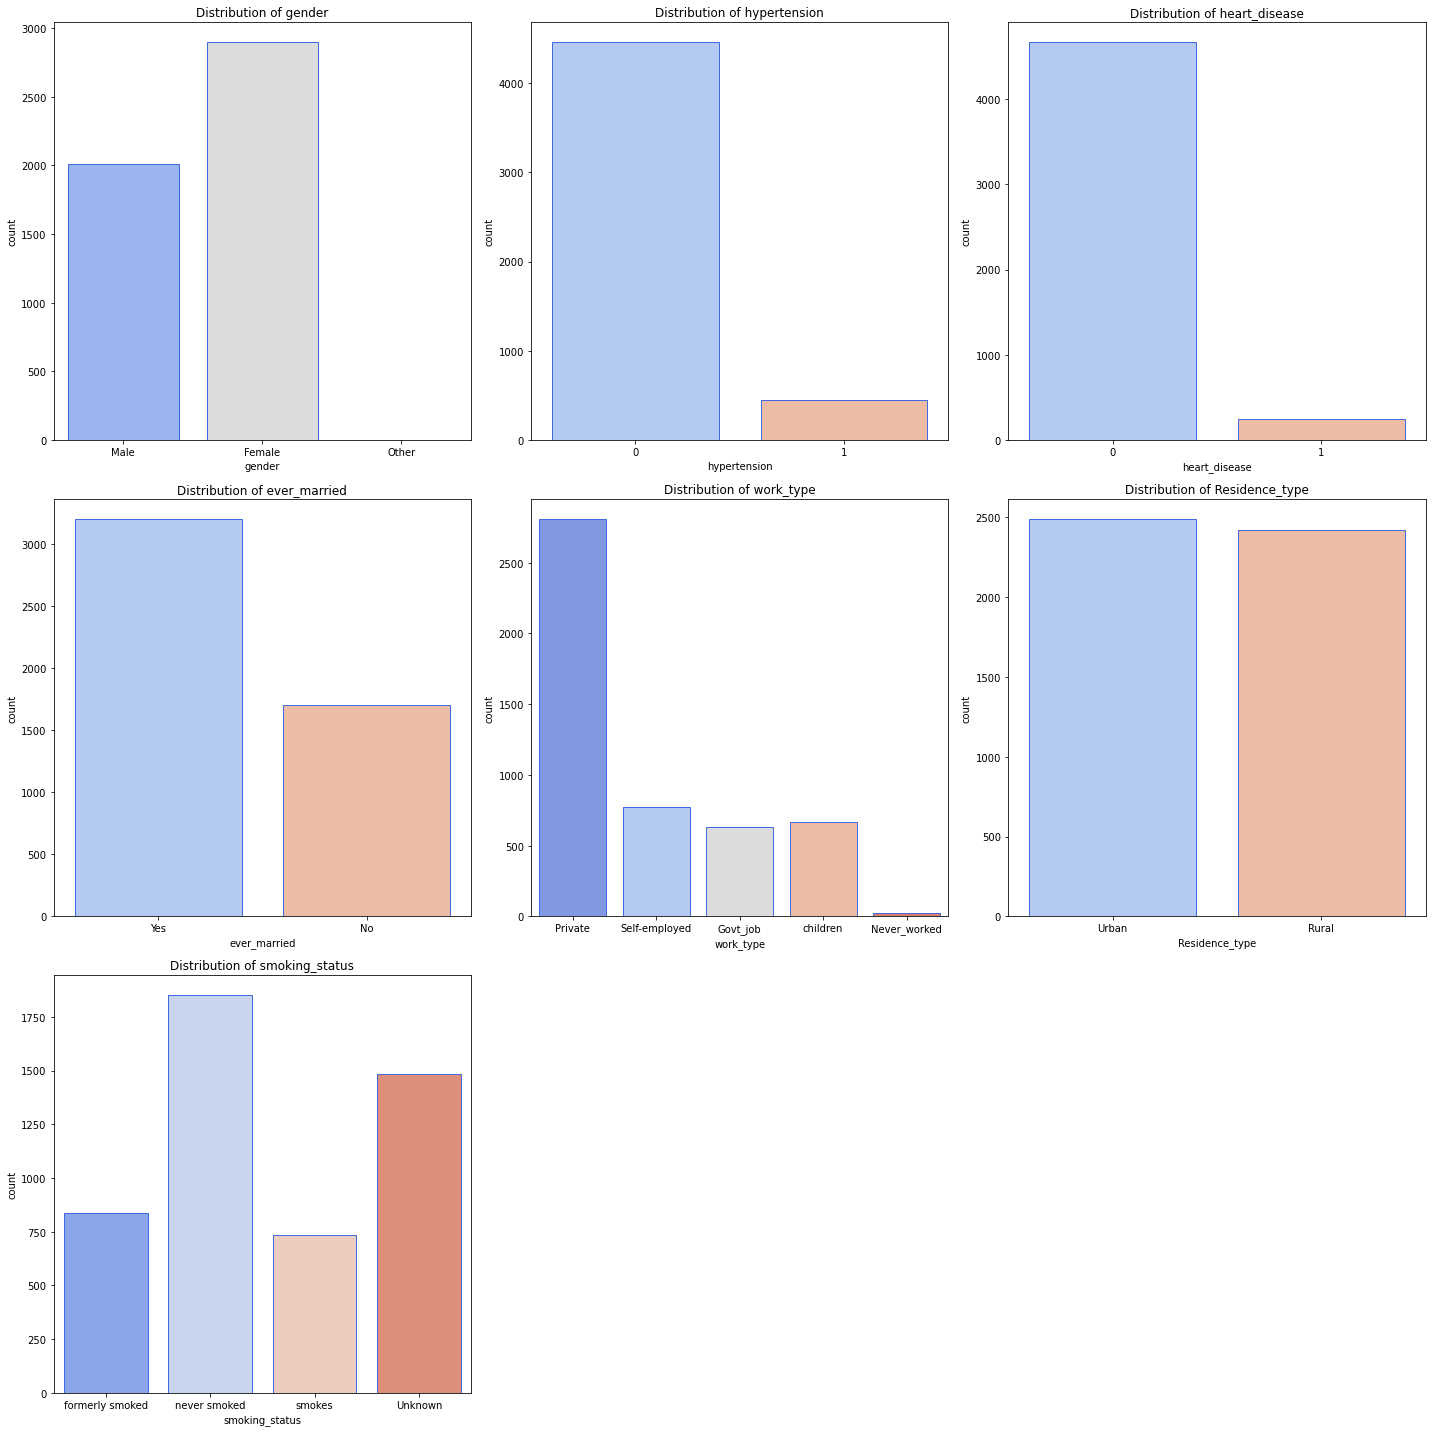

In [19]:
# Distribution plot for categorical variables\

plt.figure(figsize=(20, 20))

for i, var in enumerate(categorical, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=df, palette="coolwarm", edgecolor='royalblue')
    plt.title(f"Distribution of {var}")
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

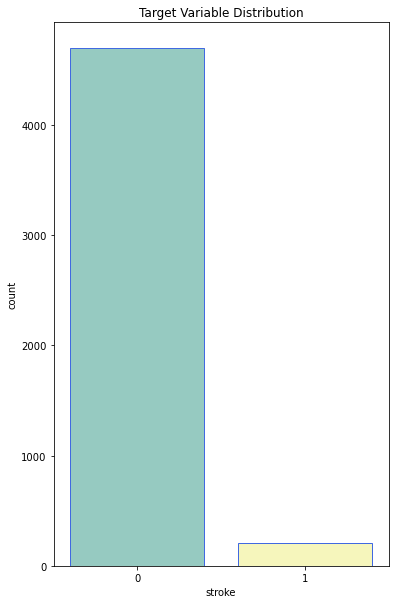

In [20]:
plt.figure(figsize=(6, 10))

sns.countplot(x='stroke', data=df, palette='Set3', edgecolor='royalblue')
plt.title('Target Variable Distribution')
plt.show()

In [21]:
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

# Bivariate Analysis

## Correlation

Correlations with the target variable:
            Variable  Correlation
0                age     0.232331
1  avg_glucose_level     0.138936
2                bmi     0.042374


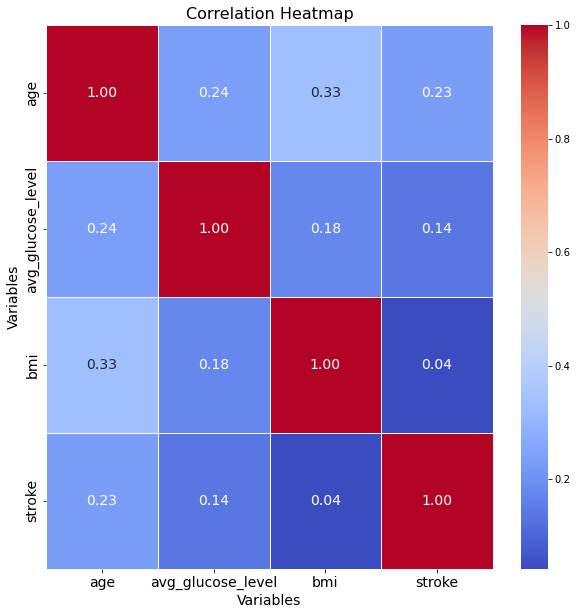

In [22]:
# Compute correlations
correlation_df = df[numeric + target].corr()

# Extract correlations of numeric variables with the target
target_correlations = correlation_df[target].drop(target).reset_index()
target_correlations.columns = ['Variable', 'Correlation']
print("Correlations with the target variable:")
print(target_correlations)

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 14})
plt.title("Correlation Heatmap", fontsize=16)

# Increase font size for axis labels
plt.title("Correlation Heatmap", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Variables", fontsize=14)

# Adjust font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

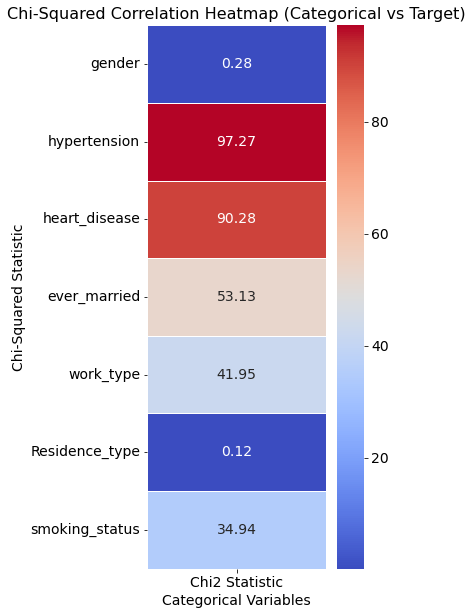

In [23]:
from scipy.stats import chi2_contingency

target = 'stroke'

# Function to calculate the chi-squared test between each categorical variable and target
def chi2_corr(df, categorical, target):
    chi2_values = {}
    p_values = {}
    
    for var in categorical:
        # Create contingency table
        contingency = pd.crosstab(df[var], df[target])
        
        # Perform Chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency)
        
        # Store the results
        chi2_values[var] = chi2
        p_values[var] = p
    
    return pd.DataFrame({'Chi2 Statistic': chi2_values, 'P-Value': p_values})

# Compute chi-squared test results
chi2_results = chi2_corr(df, categorical, target)

# Plot vertical heatmap for Chi-squared statistics
plt.figure(figsize=(4, 10))
sns.heatmap(chi2_results[['Chi2 Statistic']], annot=True, cmap='coolwarm', fmt=".2f", 
            cbar=True, linewidths=0.5, cbar_kws={'label': 'Chi-Squared Statistic'},
            annot_kws={"size": 14})

# Increase font size for labels
plt.title("Chi-Squared Correlation Heatmap (Categorical vs Target)", fontsize=16)
plt.xlabel("Categorical Variables", fontsize=14)
plt.ylabel("Chi-Squared Statistic", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=    0)

# Increase font size of the colorbar ticks
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_label('')  # Remove the label
# cbar.set_label('Chi-Squared Statistic', fontsize=16)  # Increase the font size of the label

plt.show()


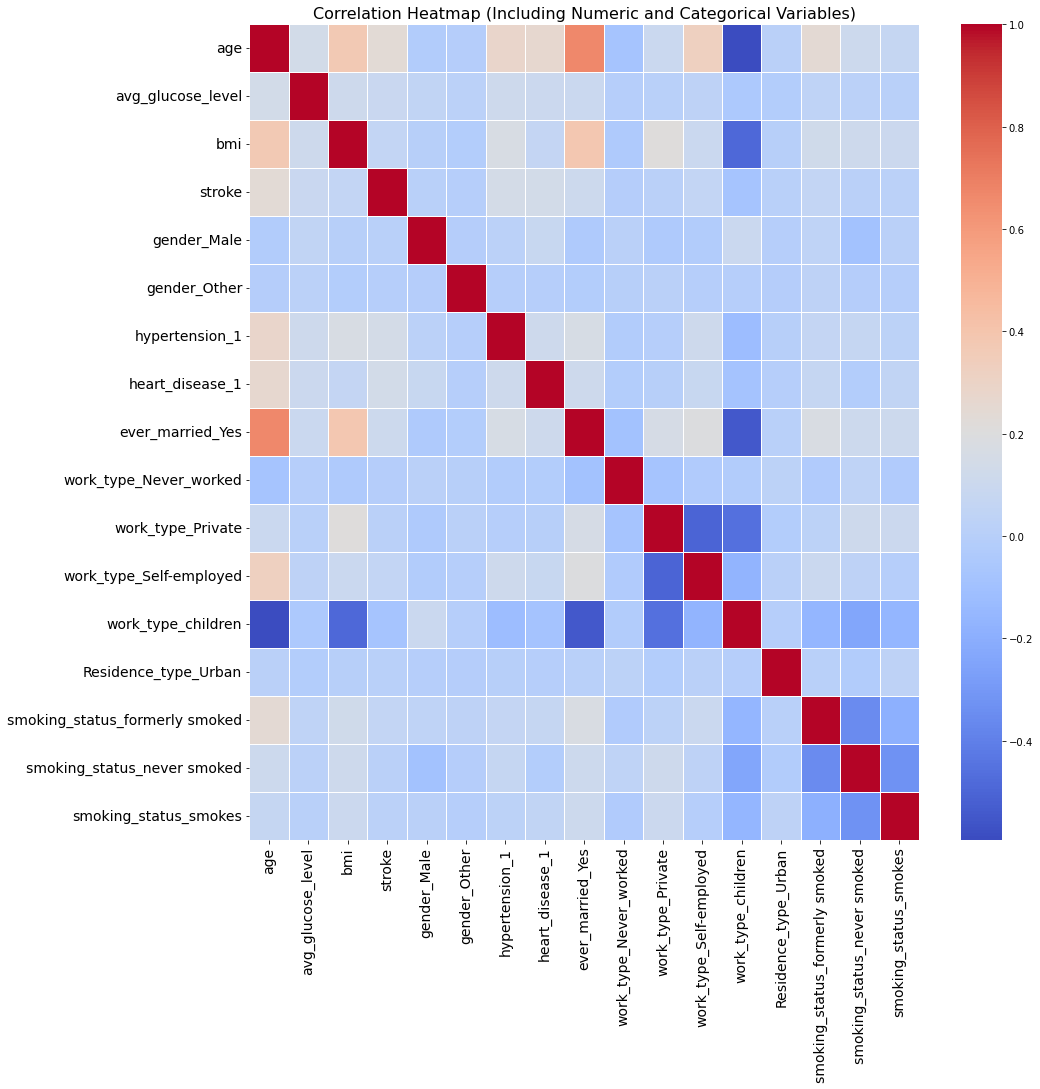

In [24]:
# Convert categorical variables into numerical representations using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)

# Compute correlation matrix using Spearman correlation (better for categorical data)
correlation_matrix = df_encoded.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap (Including Numeric and Categorical Variables)", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()


In [25]:
correlation_matrix[correlation_matrix>0.2]

age  avg_glucose_level       bmi  \
age                             1.000000                NaN  0.375650   
avg_glucose_level                    NaN                1.0       NaN   
bmi                             0.375650                NaN  1.000000   
stroke                          0.235070                NaN       NaN   
gender_Male                          NaN                NaN       NaN   
gender_Other                         NaN                NaN       NaN   
hypertension_1                  0.278756                NaN       NaN   
heart_disease_1                 0.261728                NaN       NaN   
ever_married_Yes                0.668354                NaN  0.385833   
work_type_Never_worked               NaN                NaN       NaN   
work_type_Private                    NaN                NaN  0.213132   
work_type_Self-employed         0.327143                NaN       NaN   
work_type_children                   NaN                NaN       NaN   
Residence_type_Urban                 NaN                NaN       NaN   
smoking_status_formerly smoked  0.242998                NaN       NaN   
smoking_status_never smoked          NaN                NaN       NaN   
smoking_status_smokes                NaN                NaN       NaN   

                                 stroke  gender_Male  gender_Other  \
age                             0.23507          NaN           NaN   
avg_glucose_level                   NaN          NaN           NaN   
bmi                                 NaN          NaN           NaN   
stroke                          1.00000          NaN           NaN   
gender_Male                         NaN          1.0           NaN   
gender_Other                        NaN          NaN           1.0   
hypertension_1                      NaN          NaN           NaN   
heart_disease_1                     NaN          NaN           NaN   
ever_married_Yes                    NaN          NaN           NaN   
work_type_Never_worked              NaN          NaN           NaN   
work_type_Private                   NaN          NaN           NaN   
work_type_Self-employed             NaN          NaN           NaN   
work_type_children                  NaN          NaN           NaN   
Residence_type_Urban                NaN          NaN           NaN   
smoking_status_formerly smoked      NaN          NaN           NaN   
smoking_status_never smoked         NaN          NaN           NaN   
smoking_status_smokes               NaN          NaN           NaN   

                                hypertension_1  heart_disease_1  \
age                                   0.278756         0.261728   
avg_glucose_level                          NaN              NaN   
bmi                                        NaN              NaN   
stroke                                     NaN              NaN   
gender_Male                                NaN              NaN   
gender_Other                               NaN              NaN   
hypertension_1                        1.000000              NaN   
heart_disease_1                            NaN         1.000000   
ever_married_Yes                           NaN              NaN   
work_type_Never_worked                     NaN              NaN   
work_type_Private                          NaN              NaN   
work_type_Self-employed                    NaN              NaN   
work_type_children                         NaN              NaN   
Residence_type_Urban                       NaN              NaN   
smoking_status_formerly smoked             NaN              NaN   
smoking_status_never smoked                NaN              NaN   
smoking_status_smokes                      NaN              NaN   

                                ever_married_Yes  work_type_Never_worked  \
age                                     0.668354                     NaN   
avg_glucose_level                            NaN                     NaN   
bmi                       

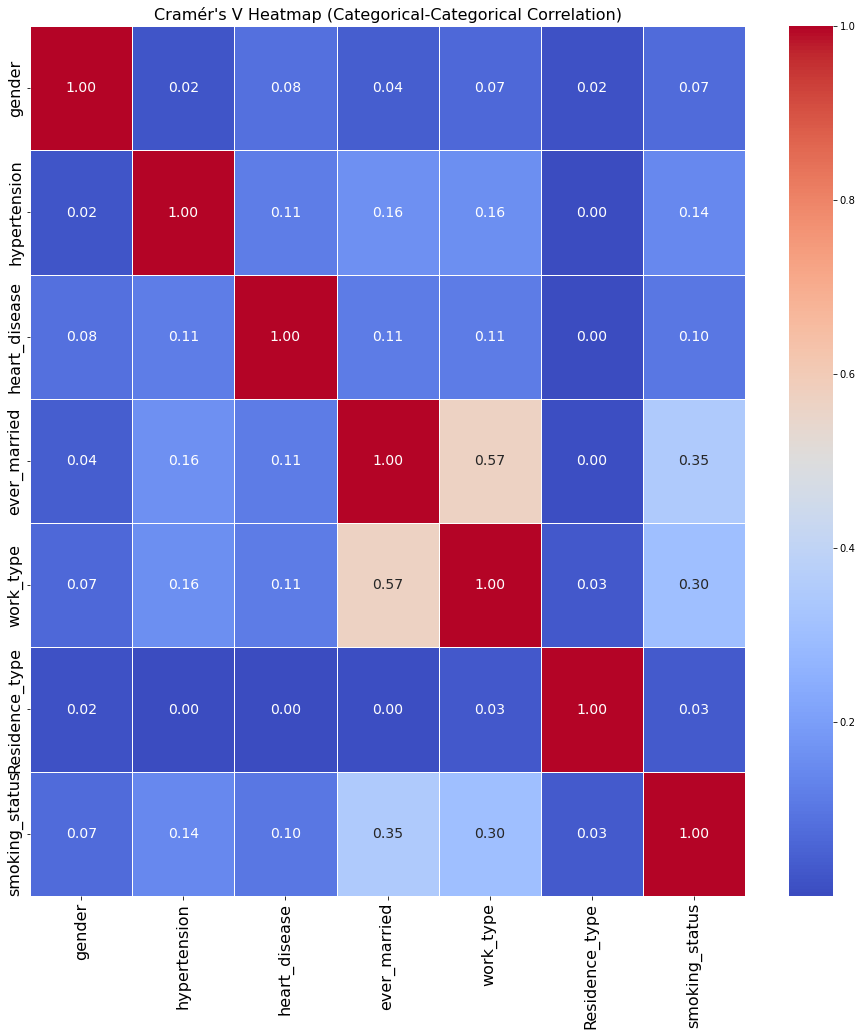

In [26]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compute Cramér's V for all categorical variable pairs
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical), len(categorical))), 
                                index=categorical, columns=categorical)

for col1 in categorical:
    for col2 in categorical:
        if col1 != col2:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)
        else:
            cramers_v_matrix.loc[col1, col2] = 1  # Perfect correlation with itself

# Plot heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(cramers_v_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 14})

plt.title("Cramér's V Heatmap (Categorical-Categorical Correlation)", fontsize=16)
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

In [27]:
cramers_v_matrix[cramers_v_matrix >= 0.2]

gender  hypertension  heart_disease  ever_married  work_type  \
gender             1.0           NaN            NaN           NaN        NaN   
hypertension       NaN           1.0            NaN           NaN        NaN   
heart_disease      NaN           NaN            1.0           NaN        NaN   
ever_married       NaN           NaN            NaN      1.000000   0.568546   
work_type          NaN           NaN            NaN      0.568546   1.000000   
Residence_type     NaN           NaN            NaN           NaN        NaN   
smoking_status     NaN           NaN            NaN      0.349370   0.303645   

                Residence_type  smoking_status  
gender                     NaN             NaN  
hypertension               NaN             NaN  
heart_disease              NaN             NaN  
ever_married               NaN        0.349370  
work_type                  NaN        0.303645  
Residence_type             1.0             NaN  
smoking_status             NaN        1.000000

## Variables Analysis based on Target

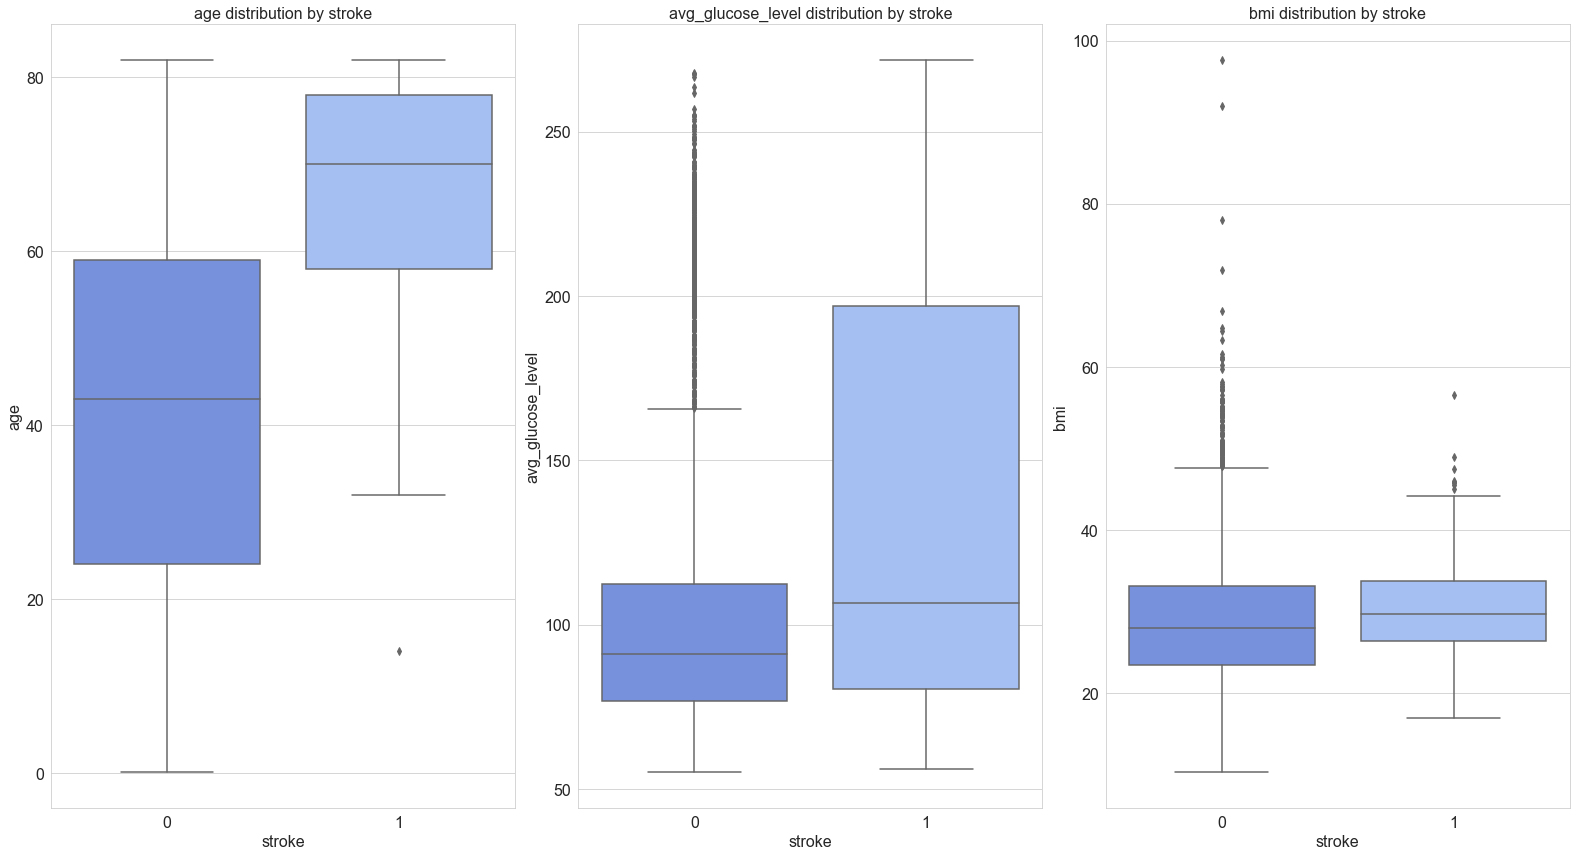

In [28]:
# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Boxplots for Numeric Variables
fig, axes = plt.subplots(nrows=1, ncols=len(numeric), figsize=(7 * len(numeric) + 1, 12))
for i, col in enumerate(numeric):
    sns.boxplot(x=df[target], y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} distribution by {target}', fontsize=16)
    axes[i].set_xlabel(target, fontsize=16)
    axes[i].set_ylabel(col, fontsize=16)
    axes[i].tick_params(axis='both', labelsize=16)

plt.tight_layout()
plt.show()

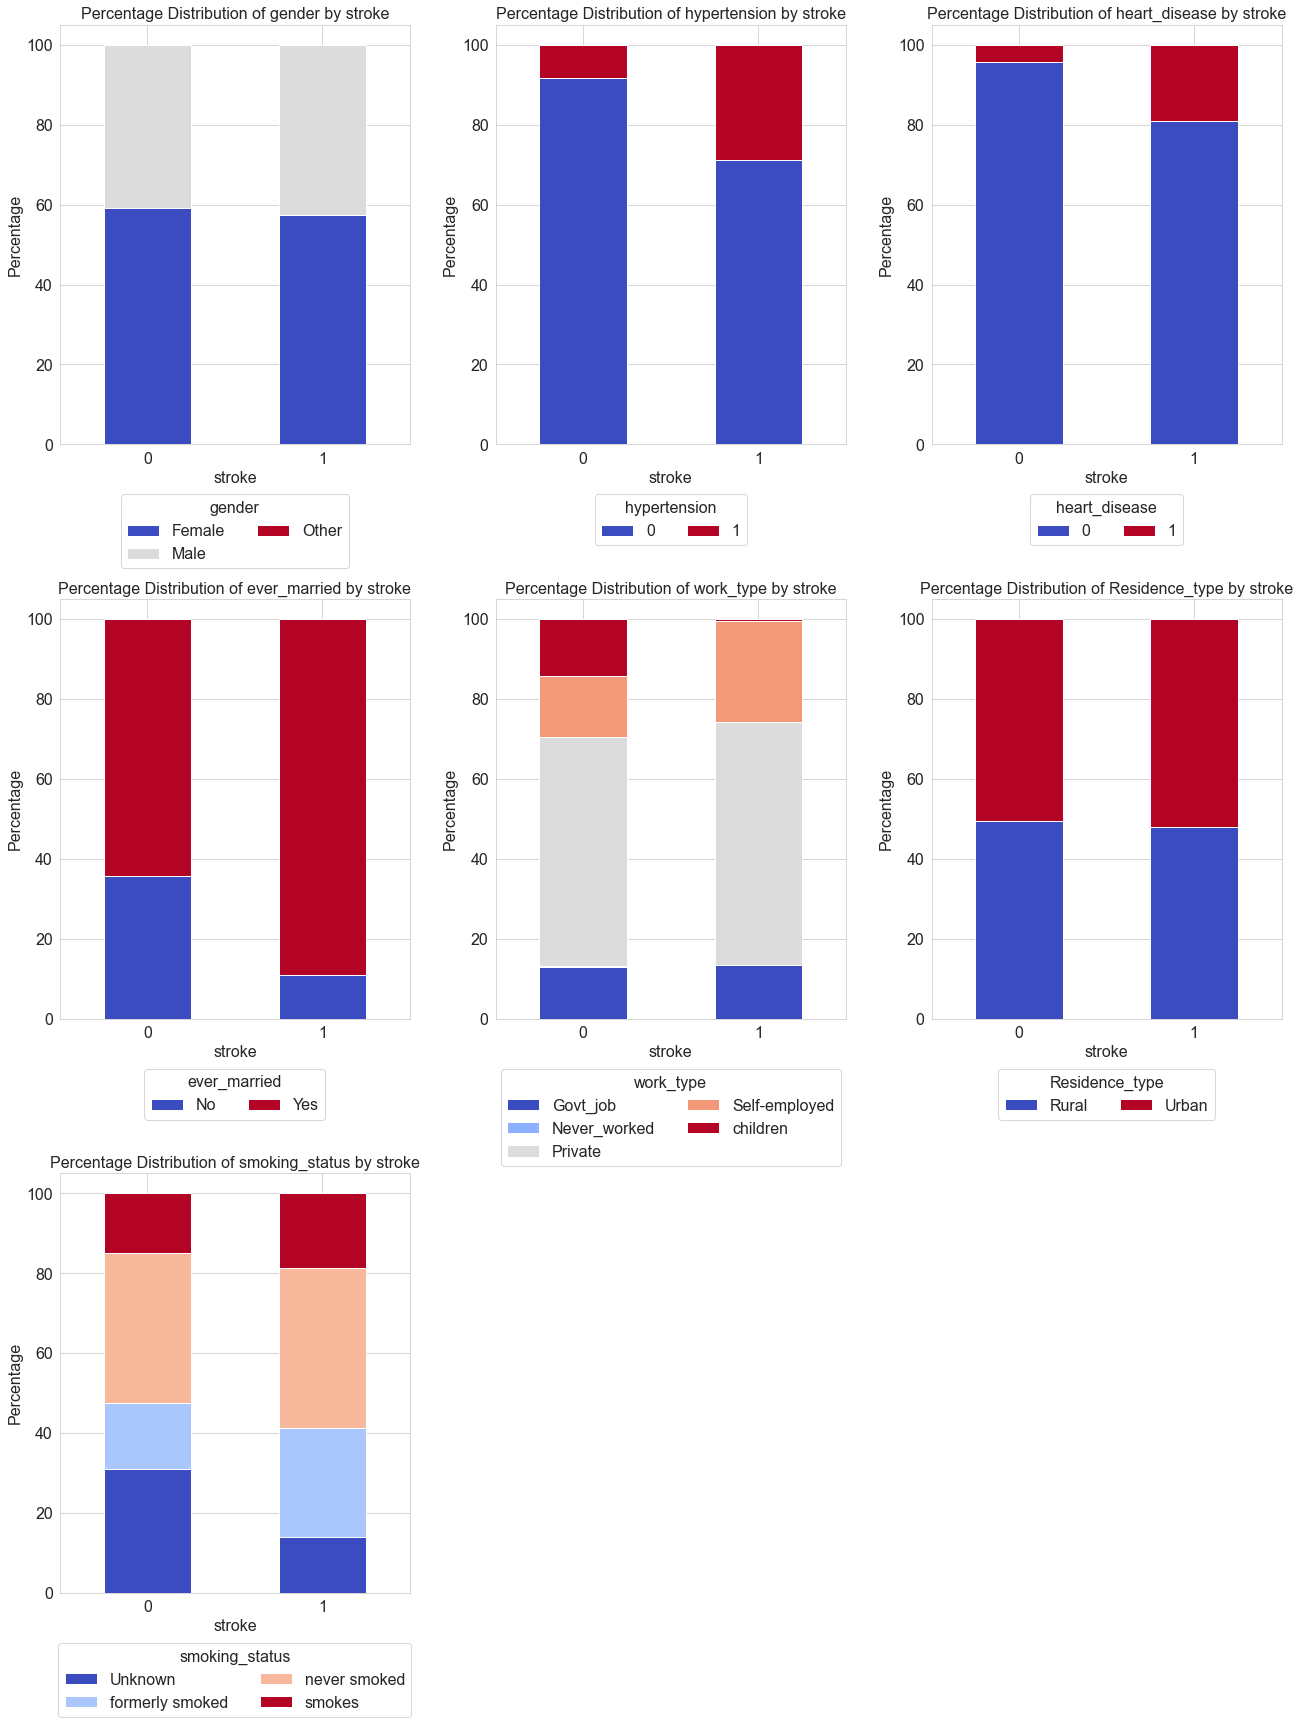

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Percentage Distribution Charts where each bar represents stroke category
n_rows = math.ceil(len(categorical) / 3)  # Arrange plots with 2 per row
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, 8 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical):
    # Calculate percentage distribution for each stroke category
    category_counts = df.groupby([target, col]).size().unstack()
    category_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100  # Convert to percentage

    # Stacked bar plot
    category_percentage.plot(kind='bar', stacked=True, ax=axes[i], colormap="coolwarm")

    axes[i].set_title(f'Percentage Distribution of {col} by {target}', fontsize=16)
    axes[i].set_xlabel(target, fontsize=16)
    axes[i].set_ylabel("Percentage", fontsize=16)
    axes[i].tick_params(axis='x', rotation=0, labelsize=16)
    axes[i].tick_params(axis='y', labelsize=16)
    
    # Adjusting legend position (below the chart)
    legend = axes[i].legend(title=col, fontsize=16, title_fontsize=16, loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2)

# Hide any unused subplot spaces if categorical variables are odd-numbered
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Identify Stroke Risk Factors

## Chi-Square Test for Categorical Variables

In [30]:
import pandas as pd
import scipy.stats as stats

# Perform Chi-Square test for each categorical variable
chi_square_results = {}
for col in categorical:
    contingency_table = pd.crosstab(df[col], df['stroke'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi_square_results[col] = p  # Store p-value

# Convert to DataFrame and display only significant variables (p < 0.05)
chi_square_df = pd.DataFrame(chi_square_results.items(), columns=['Variable', 'P-Value'])
chi_square_df = chi_square_df[chi_square_df['P-Value'] < 0.05]

chi_square_df


Variable       P-Value
1    hypertension  6.033751e-23
2   heart_disease  2.067778e-21
3    ever_married  3.128341e-13
4       work_type  1.705567e-08
6  smoking_status  1.252202e-07

## T-Test / Mann-Whitney U Test for Numeric Variables

In [31]:
numeric_test_results = {}
for col in numeric:
    stroke_group = df[df['stroke'] == 1][col]
    non_stroke_group = df[df['stroke'] == 0][col]
    
    # Use T-test if normally distributed, else use Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(stroke_group, non_stroke_group, alternative='two-sided')
    
    numeric_test_results[col] = p_value

# Convert to DataFrame and display only significant variables (p < 0.05)
numeric_test_df = pd.DataFrame(numeric_test_results.items(), columns=['Variable', 'P-Value'])
numeric_test_df = numeric_test_df[numeric_test_df['P-Value'] < 0.05]

numeric_test_df

Variable       P-Value
0                age  6.200260e-61
1  avg_glucose_level  8.168450e-10
2                bmi  1.026429e-04

## Odds Ratios for Binary Variables

In [32]:
odds_ratios = {}
for col in ['hypertension', 'heart_disease']:  # Binary categorical variables
    contingency_table = pd.crosstab(df[col], df['stroke'])
    odds_ratio = (contingency_table.iloc[1,1] / contingency_table.iloc[1,0]) / \
                 (contingency_table.iloc[0,1] / contingency_table.iloc[0,0])
    odds_ratios[col] = odds_ratio

# Convert to DataFrame
odds_ratio_df = pd.DataFrame(odds_ratios.items(), columns=['Variable', 'Odds Ratio'])
odds_ratio_df

Variable  Odds Ratio
0   hypertension    4.437769
1  heart_disease    5.243245

# Preprocessing

In [33]:
# ## Categorical Variable Encoding

# df_cleaned = df.copy()

# # One-hot encode categorical variables
# df_cleaned = pd.get_dummies(df_cleaned, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# # Encode binary categorical variables
# df_cleaned['ever_married'] = df_cleaned['ever_married'].map({'No': 0, 'Yes': 1})
# df_cleaned['gender'] = df_cleaned['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

# df_cleaned.head()

# ## Define features (X) and target (y)

# X = df_cleaned.drop(columns=['stroke'])
# y = df_cleaned['stroke']  # Fixed: Replace target with 'stroke' column

# ## Split the Dataset (No Sampling Applied)

# from sklearn.model_selection import train_test_split

# # Standard train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# ## Scaling Numeric Features (Train & Test Separately Using Predefined `numeric` List)

# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()  # Use RobustScaler due to outliers

# # Scale only the numeric columns using the predefined `numeric` list
# X_train.loc[:, numeric] = scaler.fit_transform(X_train.loc[:, numeric])
# X_test.loc[:, numeric] = scaler.transform(X_test.loc[:, numeric])

# ## Create Two Versions of the Dataset (Without Sampling)

# # First option: Full training dataset without any resampling
# X_train_full = X_train.copy()  # Original training set
# y_train_full = y_train.copy()  # Original target values

# # Second option: Dataset without 'gender' and 'Residence_type'
# X_train_reduced = X_train_full.drop(columns=['gender', 'Residence_type_Urban'])  # Exclude specified columns


In [99]:
## Categorical Variable Encoding

df_cleaned = df.copy()

# One-hot encode categorical variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Encode binary categorical variables
df_cleaned['ever_married'] = df_cleaned['ever_married'].map({'No': 0, 'Yes': 1})
df_cleaned['gender'] = df_cleaned['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

df_cleaned.head()

## Define features (X) and target (y)

X = df_cleaned.drop(columns=['stroke'])
y = df_cleaned['stroke']  # Fixed: Replace target with 'stroke' column

## Split the Dataset (No Sampling Applied)

from sklearn.model_selection import train_test_split

# Standard train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Scaling Numeric Features (Train & Test Separately Using Predefined `numeric` List)

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()  # Use RobustScaler due to outliers

# Scale only the numeric columns using the predefined `numeric` list
X_train.loc[:, numeric] = scaler.fit_transform(X_train.loc[:, numeric])
X_test.loc[:, numeric] = scaler.transform(X_test.loc[:, numeric])

## Create a Balanced Training Dataset (All class 1 and 500 observations from class 0)

import numpy as np

# Get the indices for each class in the training set
idx_class0 = y_train[y_train == 0].index
idx_class1 = y_train[y_train == 1].index

# Sample 500 observations from class 0 (if there are at least 500, otherwise adjust accordingly)
np.random.seed(42)
idx_class0_sampled = np.random.choice(idx_class0, size=400, replace=False)

# Combine sampled class 0 indices with all class 1 indices
balanced_idx = np.concatenate([idx_class0_sampled, idx_class1])

# Create the balanced training set
X_train_balanced = X_train.loc[balanced_idx]
y_train_balanced = y_train.loc[balanced_idx]

## Create Two Versions of the Balanced Training Dataset

# First option: Full balanced training dataset
X_train_full = X_train_balanced.copy()  # Use balanced training set
y_train_full = y_train_balanced.copy()  # Balanced target values

# Second option: Reduced dataset without 'gender' and 'Residence_type_Urban'
X_train_reduced = X_train_full.drop(columns=['gender', 'Residence_type_Urban'])  # Exclude specified columns
X_test_reduced = X_test.drop(columns=['gender', 'Residence_type_Urban'])  # Exclude specified columns


In [93]:
y_train_full.value_counts()

0    400
1    167
Name: stroke, dtype: int64

In [94]:
y_test.value_counts()

0    940
1     42
Name: stroke, dtype: int64

# Model Fitting

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

#  Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(is_unbalance=True)
}


# Split datasets
datasets = {
    "Full Dataset": (X_train_full, X_test, y_train_full, y_test),
    "Reduced Dataset": (X_train_reduced, X_test_reduced, y_train_full, y_test)
}

In [120]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define threshold values to test
threshold_values = np.arange(0.1, 0.55, 0.05)  # Test thresholds from 0.1 to 0.45

# Store results & trained models
results = []
feature_importance_results = {}
trained_models = {}  # Dictionary to store the best trained models

# Loop through each dataset and each model
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    for model_name, model in models.items():
        print(f"\n🔹 Tuning & Training {model_name} on {dataset_name}...")

        # 1. Grid Search for Hyperparameter Tuning
        grid_search = GridSearchCV(
            model,
            param_grids[model_name],
            cv=2,              
            scoring="recall",
            n_jobs=-1,         
            verbose=2
        )
        grid_search.fit(X_train, y_train)

        # Best model from Grid Search
        best_model = grid_search.best_estimator_
        print(f"\n✅ Best Parameters for {model_name}: {grid_search.best_params_}")

        # 2. Train the best model
        trained_model = best_model.fit(X_train, y_train)

        # ✅ Store the trained model in the dictionary
        trained_models[f"{model_name} ({dataset_name})"] = trained_model

        # 3. Get predicted probabilities
        y_test_prob = trained_model.predict_proba(X_test)[:, 1]

        # 4. Loop through multiple thresholds
        for custom_threshold in threshold_values:
            # Apply the custom threshold
            y_test_pred_custom = (y_test_prob > custom_threshold).astype(int)

            # Evaluate performance
            report_dict = classification_report(y_test, y_test_pred_custom, output_dict=True)

            # Extract key metrics
            accuracy = report_dict.get("accuracy", np.nan)
            precision = report_dict.get("weighted avg", {}).get("precision", np.nan)
            recall = report_dict.get("weighted avg", {}).get("recall", np.nan)
            f1 = report_dict.get("weighted avg", {}).get("f1-score", np.nan)
            
            accuracy_1 = report_dict.get("accuracy", np.nan)
            precision_1 = report_dict.get("1", {}).get("precision", np.nan)
            recall_1 = report_dict.get("1", {}).get("recall", np.nan)
            f1_1 = report_dict.get("1", {}).get("f1-score", np.nan)

            # Save results
            result_entry = {
                "Dataset": dataset_name,
                "Model": model_name,
                "Threshold": custom_threshold,
                "Best_Params": grid_search.best_params_,
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall,
                "F1": f1,
                "Accuracy (class 1)": accuracy_1,
                "Precision (class 1)": precision_1,
                "Recall (class 1)": recall_1,
                "F1 (class 1)": f1_1
            }
            results.append(result_entry)

        # 5. Feature Importance Extraction
        if model_name == "Logistic Regression":
            importance = np.abs(trained_model.coef_[0])
        else:
            importance = trained_model.feature_importances_
        
        feature_importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        feature_importance_results[f"{model_name} ({dataset_name})"] = feature_importance_df

# Convert results to a DataFrame
results_df = pd.DataFrame(results)


🔹 Tuning & Training Logistic Regression on Full Dataset...
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[CV] END .....C=0.1, class_weight=balanced, solver=liblinear; total time=   0.0s
[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   0.0s
[CV] END .........C=0.1, class_weight=balanced, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.0s
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.0s
[CV] END .........C=0.1, class_weight=balanced, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   0.1s
[CV] END ...........C=1, class_weight=balanced, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, class_weight=balanced, solver=liblinear; total time=   0.0s
[CV] END .......C=1, class_weight=balanced, solver=liblinear; total time=   0.0s
[CV] END ...........C=1, class_weight=balanced, solver=lbfgs; total time=   0.1s
[CV] END ......C=10, class_weight=balanced, solver=liblinear; total time=   0.0s
[CV] END ......C=10, class_w

# Best result - Evaluation

In [185]:
results_df = pd.DataFrame(results)
results_df[(results_df['F1 (class 1)']>0.1)].sort_values('F1 (class 1)', ascending=False).head(1)

Dataset          Model  Threshold  \
15  Full Dataset  Random Forest        0.4   

                                          Best_Params  Accuracy  Precision  \
15  {'class_weight': 'balanced', 'max_depth': 30, ...  0.699593   0.951697   

      Recall        F1  Accuracy (class 1)  Precision (class 1)  \
15  0.699593  0.788833            0.699593             0.108359   

    Recall (class 1)  F1 (class 1)  
15          0.833333      0.191781

In [146]:
results_df.columns

Index(['Dataset', 'Model', 'Threshold', 'Best_Params', 'Accuracy', 'Precision',
       'Recall', 'F1', 'Accuracy (class 1)', 'Precision (class 1)',
       'Recall (class 1)', 'F1 (class 1)'],
      dtype='object')

In [176]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss

# Define the best model
best_model_name = "Random Forest"
best_dataset = "Full Dataset"
best_threshold = 0.4

# Retrieve the trained best model
best_model_key = f"{best_model_name} ({best_dataset})"
best_model = trained_models[best_model_key]

# Get the test data
X_train, X_test, y_train, y_test = datasets[best_dataset]

print(f"\n✅ Best Model Retrieved: {best_model_key} with Threshold {best_threshold}")


✅ Best Model Retrieved: Random Forest (Full Dataset) with Threshold 0.4


In [177]:
# Get predicted probabilities
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Apply the chosen threshold
y_test_pred = (y_test_prob > best_threshold).astype(int)

In [178]:
# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.82       940
           1       0.11      0.83      0.19        42

    accuracy                           0.70       982
   macro avg       0.55      0.76      0.50       982
weighted avg       0.95      0.70      0.79       982



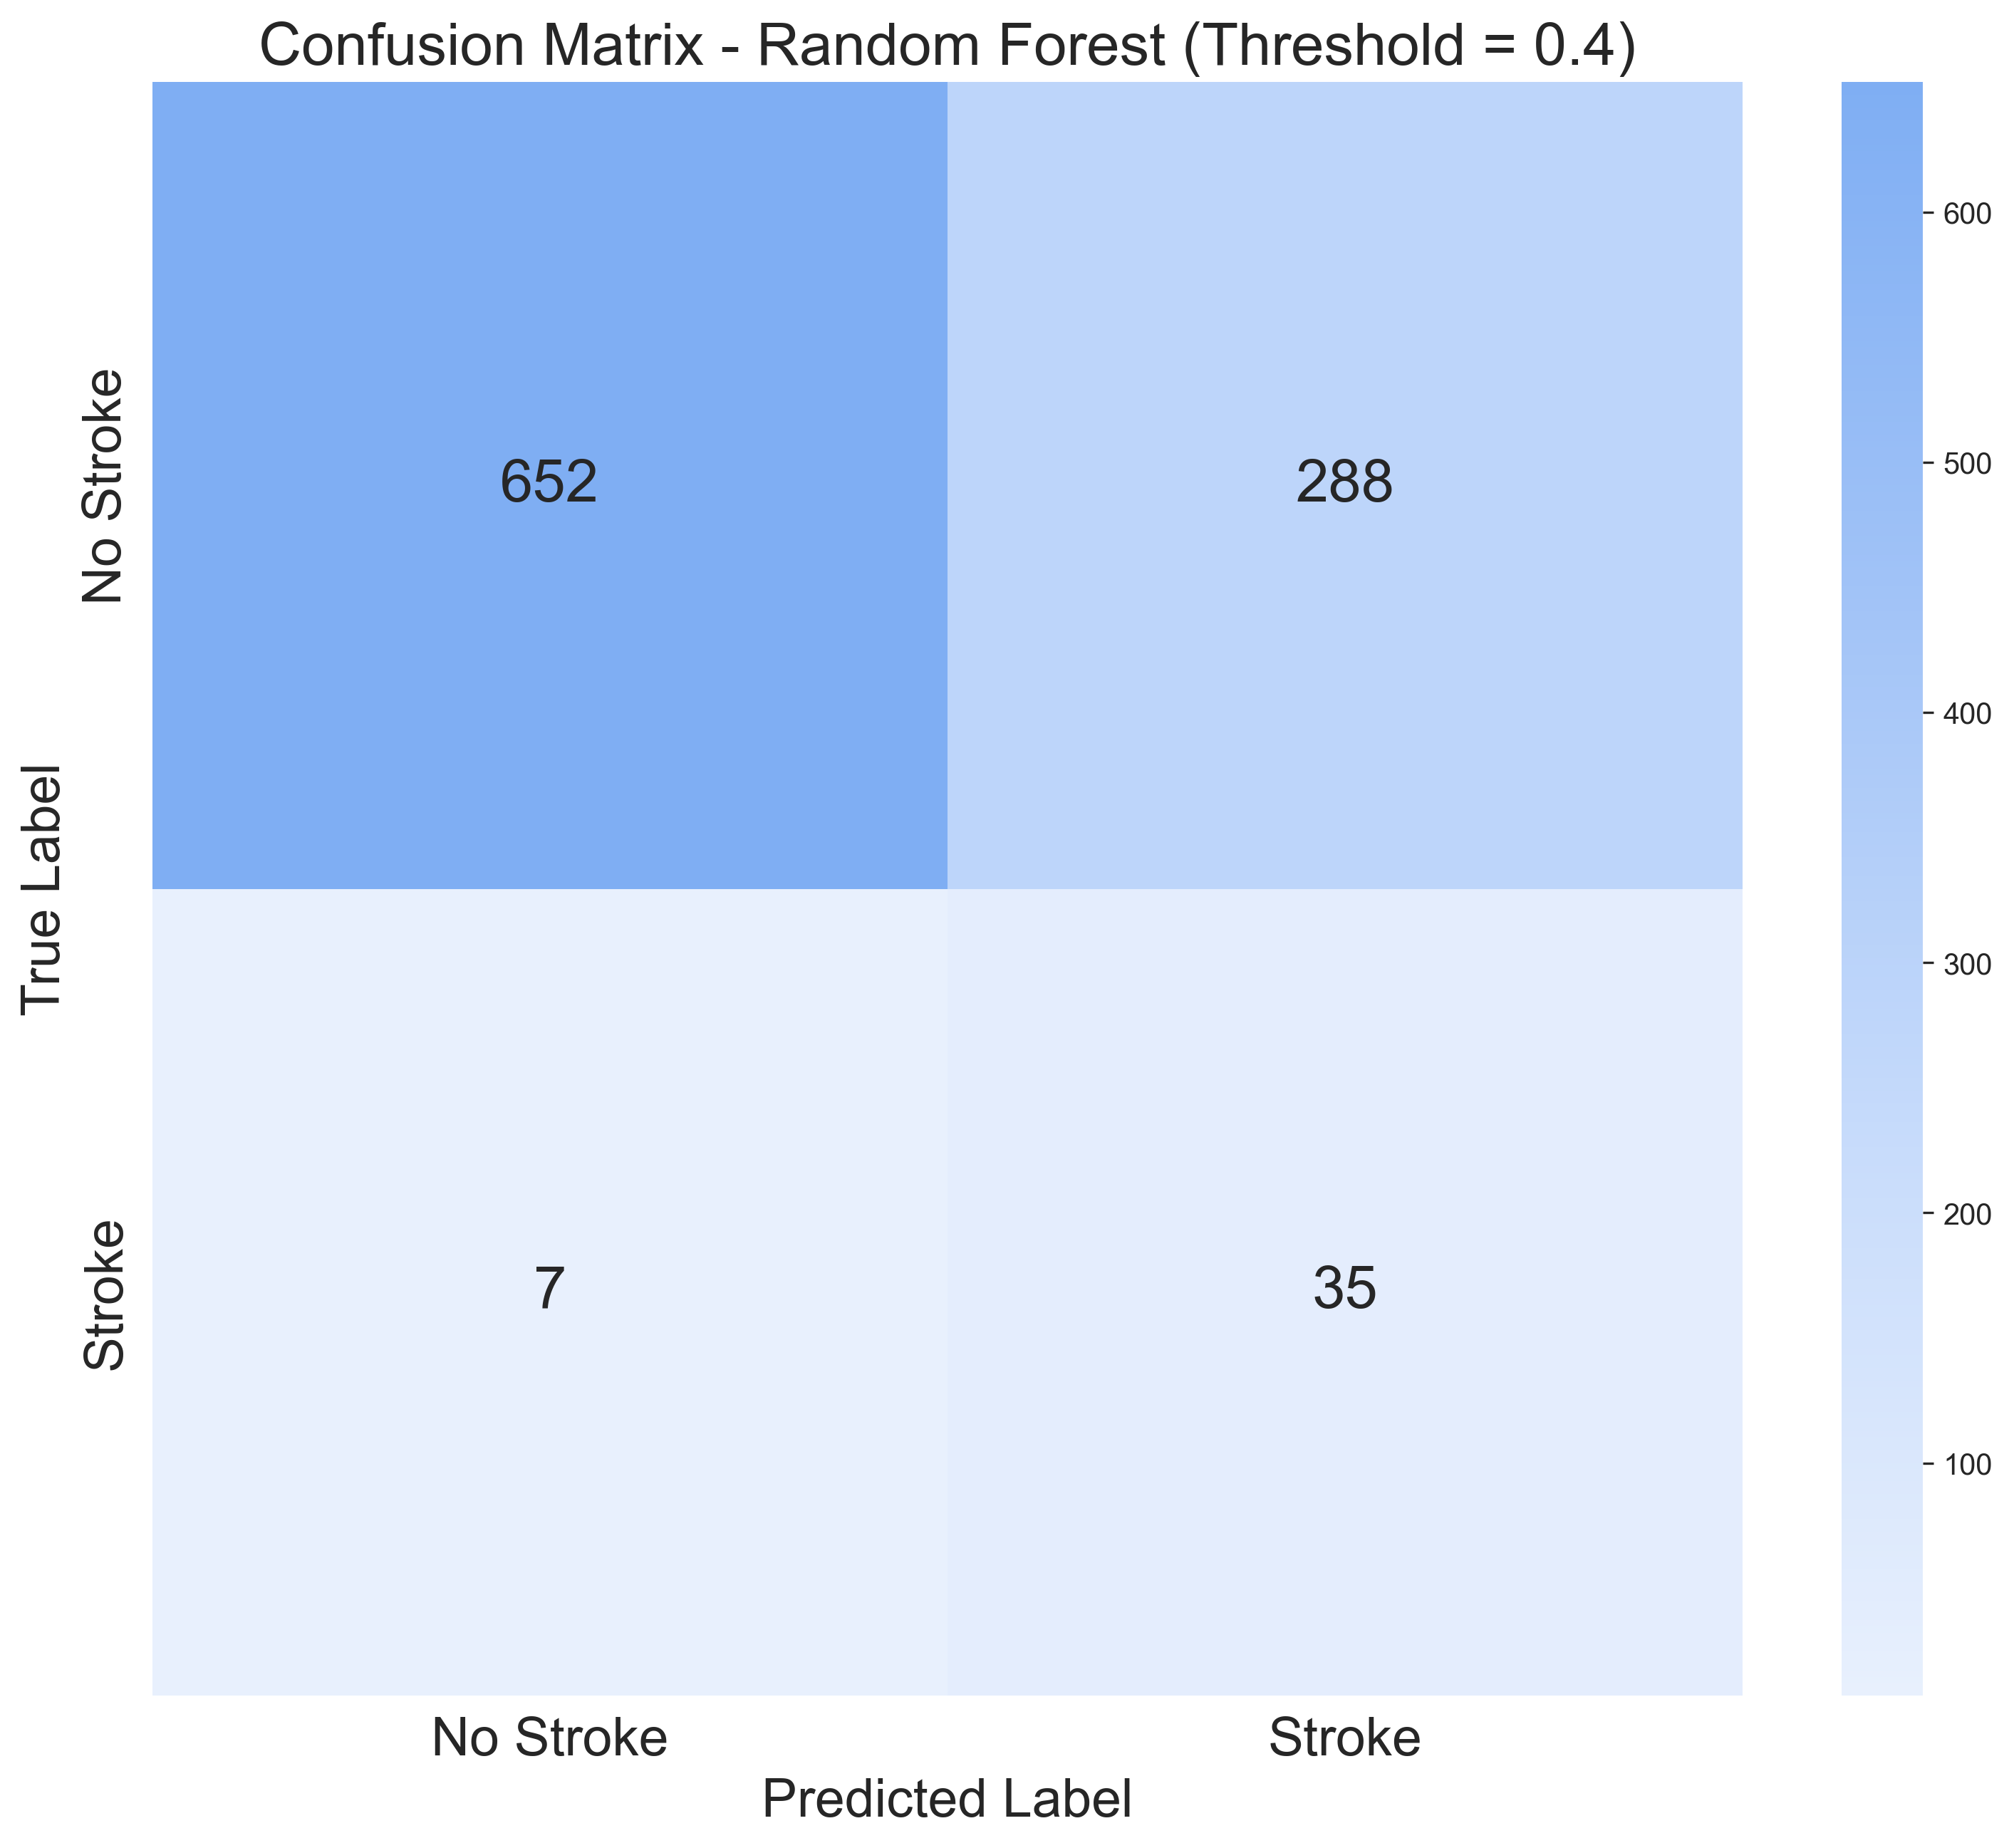

In [179]:
cmap = sns.blend_palette(["#E8F0FD", "#C8DCFB", "#A3C4F7", "#7FAEF3"], as_cmap=True)  # Adjust pastel tones

# Increase resolution and text size
plt.figure(figsize=(12,10), dpi=300)
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"],
            annot_kws={"size": 20})  # Increase annotation text size
plt.xlabel("Predicted Label", fontsize=18)
plt.ylabel("True Label", fontsize=18)
plt.title(f"Confusion Matrix - {best_model_name} (Threshold = {best_threshold})", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

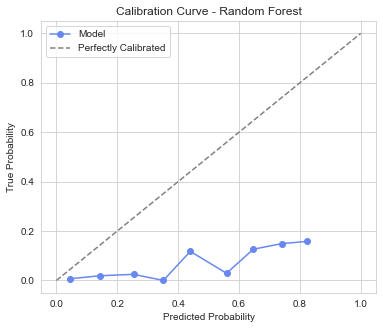

In [183]:
# Compute the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_test_prob, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, marker="o", label="Model")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfectly Calibrated")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title(f"Calibration Curve - {best_model_name}")
plt.legend()
plt.show()

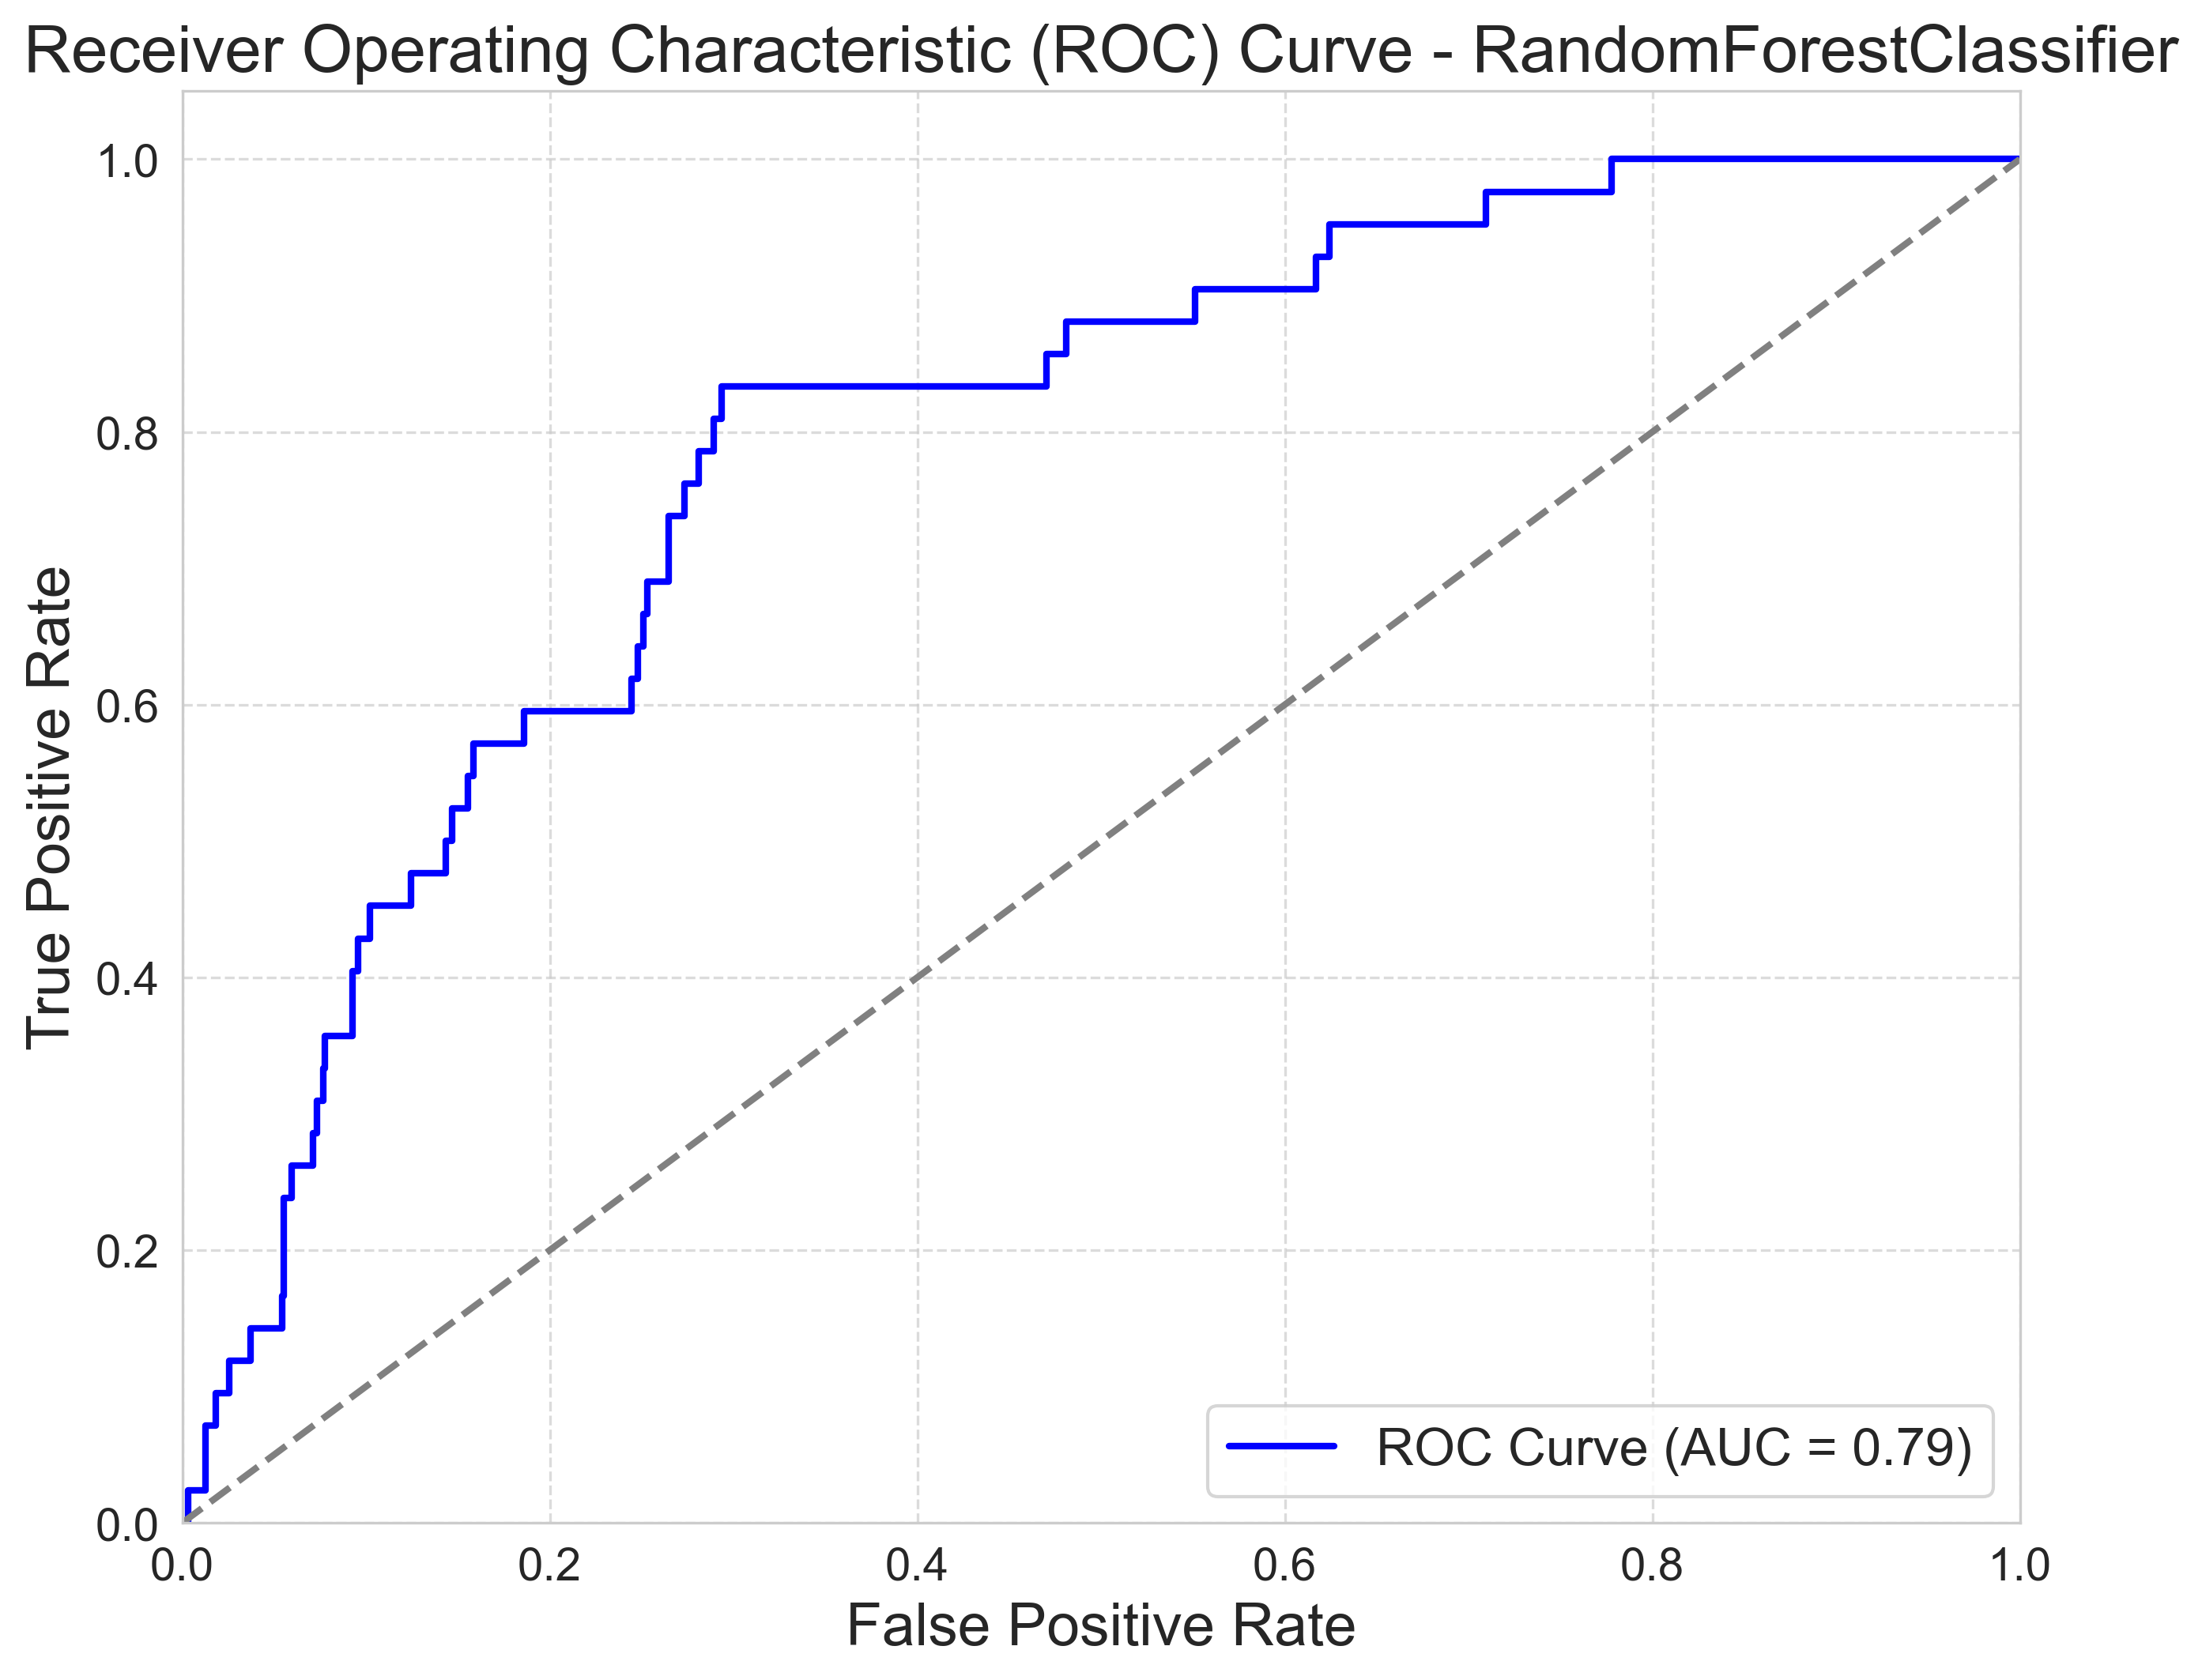

In [181]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure(figsize=(10, 8), dpi=300)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title(f'Receiver Operating Characteristic (ROC) Curve - {best_model.__class__.__name__}', fontsize=20)
plt.legend(loc='lower right', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

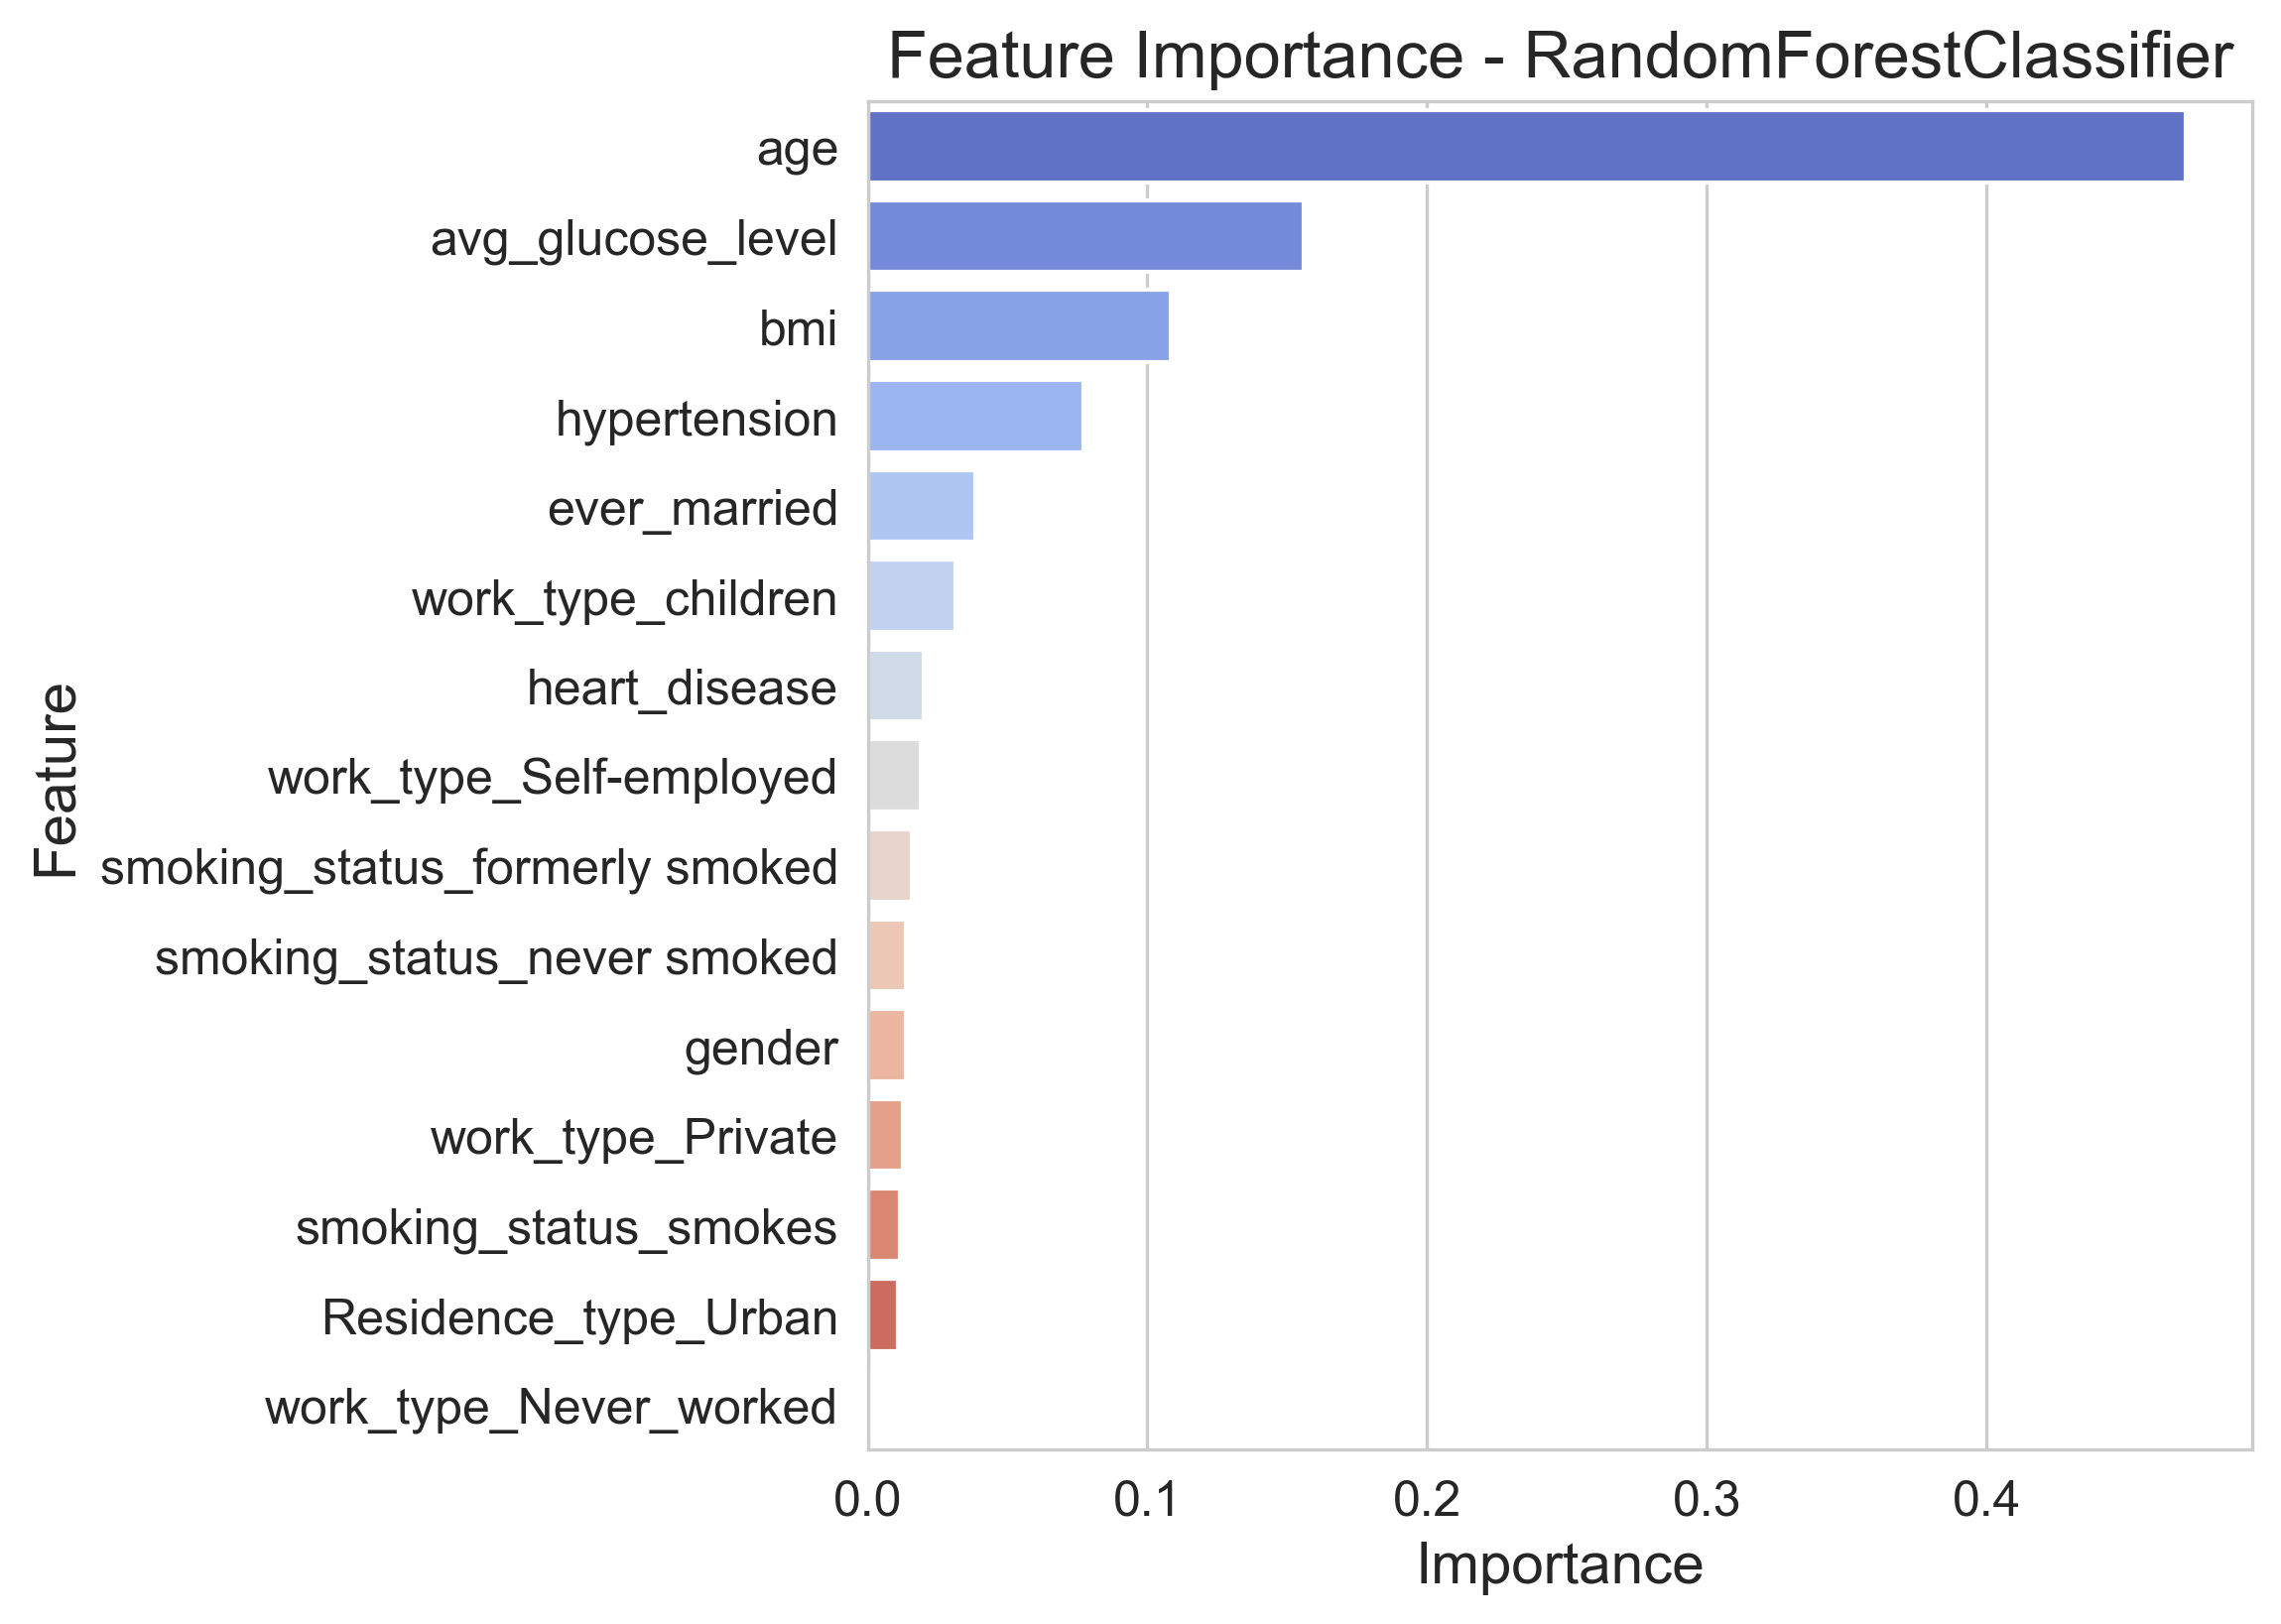

In [184]:
# Extract feature importance (works for tree-based models like XGBoost, Random Forest, LightGBM)
if hasattr(best_model, "feature_importances_"):
    feature_importance = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(6, 6), dpi=300)
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="coolwarm")
    plt.title(f"Feature Importance - {best_model.__class__.__name__}", fontsize=16)
    plt.xlabel("Importance", fontsize=14)
    plt.ylabel("Feature", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Subgroup Analysis

Stroke distribution by age group:
age_group
<18      0.001117
18-35    0.001048
36-50    0.018078
51-65    0.051075
66-80    0.138817
80+      0.200000
Name: stroke, dtype: float64


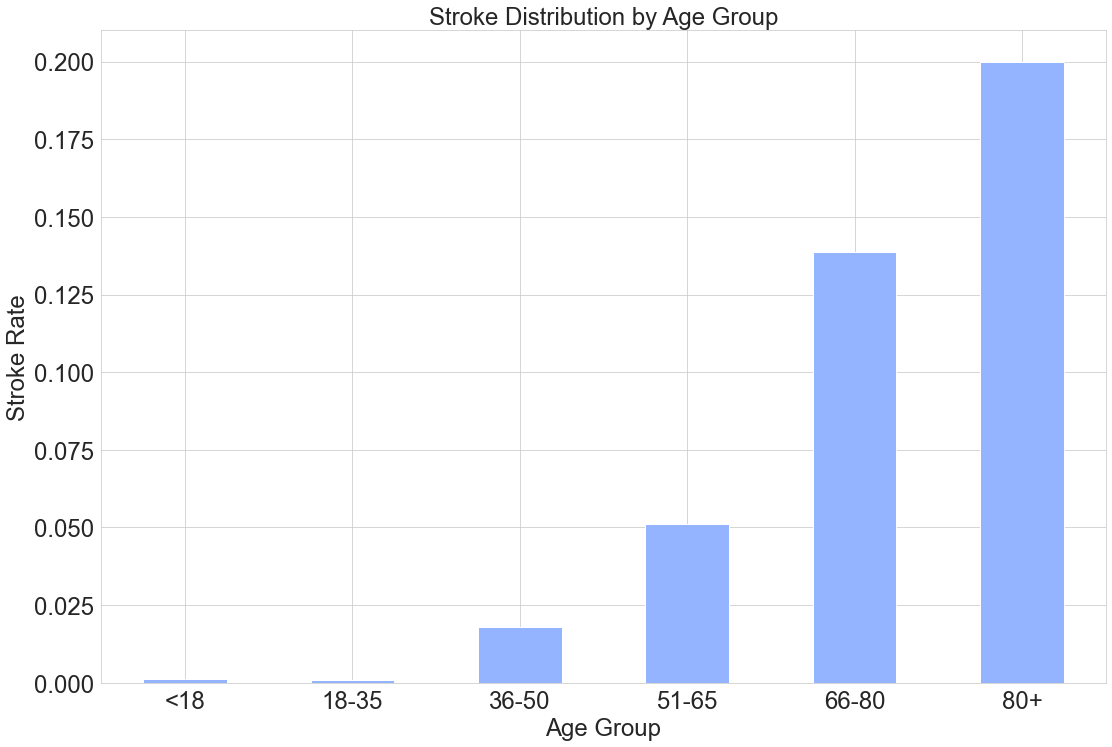

In [193]:
plt.figure(figsize=(18, 12))  # Set larger figure size

# Analyze stroke distribution by age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 80, 120], 
                         labels=['<18', '18-35', '36-50', '51-65', '66-80', '80+'])

stroke_by_age_group = df.groupby('age_group')['stroke'].mean()

# Print distribution for reference
print("Stroke distribution by age group:")
print(stroke_by_age_group)

# Plot the bar chart with larger font sizes
stroke_by_age_group.plot(kind='bar', color="#94b4ff")  # Using pastel blue for consistency

# Formatting
plt.title('Stroke Distribution by Age Group', fontsize=24)
plt.xlabel('Age Group', fontsize=24)
plt.ylabel('Stroke Rate', fontsize=24)
plt.xticks(fontsize=24, rotation=0)  # Keep labels horizontal
plt.yticks(fontsize=24)

plt.show()


Stroke distribution by work type:
work_type
Govt_job         0.044444
Never_worked     0.000000
Private          0.045180
Self-employed    0.068387
children         0.001490
Name: stroke, dtype: float64


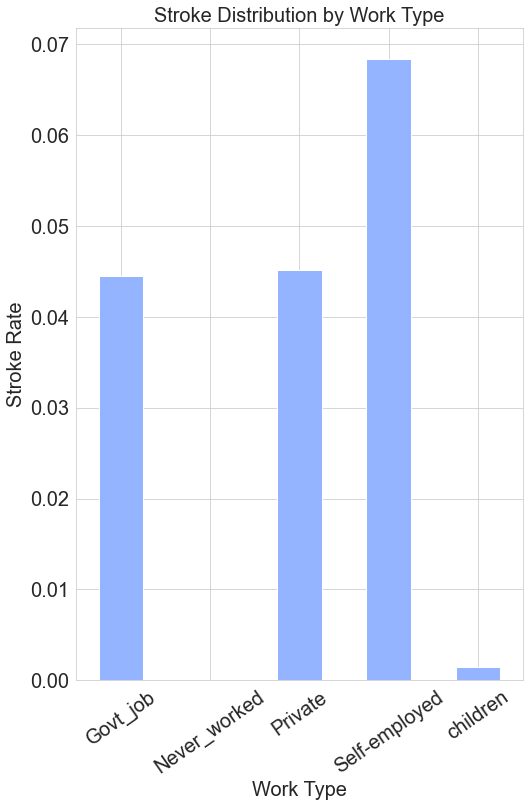

In [192]:
# Set the pastel blue color from your palette
pastel_blue = "#94b4ff"

plt.figure(figsize=(8, 12))  # Updated figsize to 10x12

# Analyze stroke distribution by work type
stroke_by_work_type = df.groupby('work_type')['stroke'].mean()

# Print distribution for reference
print("Stroke distribution by work type:")
print(stroke_by_work_type)

# Plot the bar chart with pastel blue
stroke_by_work_type.plot(kind='bar', color=pastel_blue)

# Formatting
plt.title('Stroke Distribution by Work Type', fontsize=20)
plt.xlabel('Work Type', fontsize=20)
plt.ylabel('Stroke Rate', fontsize=20)
plt.xticks(fontsize=20, rotation=35)  # Keep labels horizontal
plt.yticks(fontsize=20)

plt.show()


Stroke distribution by smoking status:
smoking_status
Unknown            0.019555
formerly smoked    0.068100
never smoked       0.045356
smokes             0.052917
Name: stroke, dtype: float64


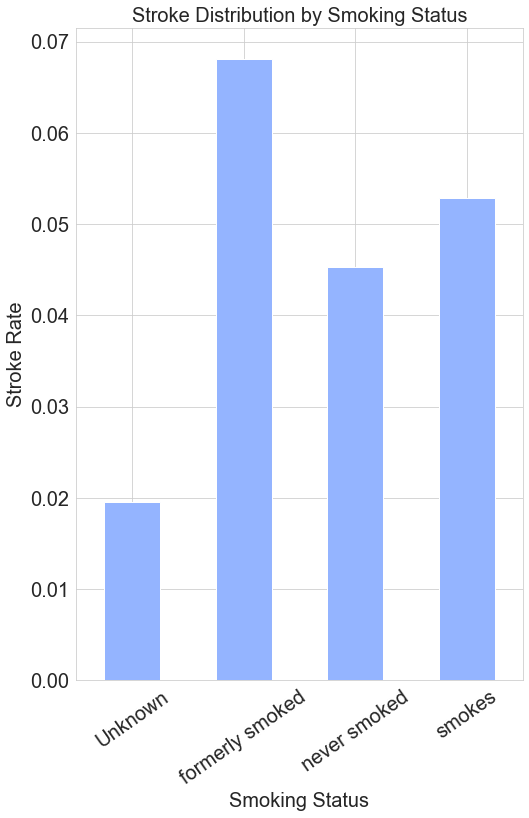

In [194]:
# Set the pastel blue color from your palette
pastel_blue = "#94b4ff"

plt.figure(figsize=(8, 12))

# Analyze stroke distribution by smoking status
stroke_by_smoking_status = df.groupby('smoking_status')['stroke'].mean()

# Print distribution for reference
print("Stroke distribution by smoking status:")
print(stroke_by_smoking_status)

# Plot the bar chart with pastel blue
stroke_by_smoking_status.plot(kind='bar', color=pastel_blue)

# Formatting
plt.title('Stroke Distribution by Smoking Status', fontsize=20)
plt.xlabel('Smoking Status', fontsize=20)
plt.ylabel('Stroke Rate', fontsize=20)
plt.xticks(fontsize=20, rotation=35)  # Adjust label rotation for better readability
plt.yticks(fontsize=20)

plt.show()


# Interaction Effects

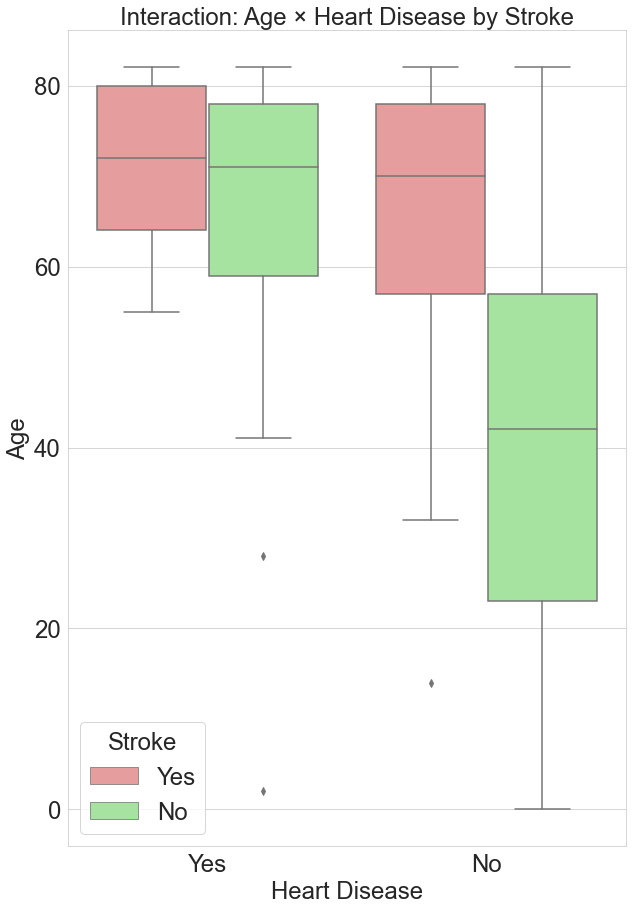

In [196]:
# Define the custom pastel palette
custom_pastel_palette = ["#f29191", "#9ded95"]  # Soft Pink, Pastel Green

# Analyze interaction effects (e.g., Age × Heart Disease)
plt.figure(figsize=(10, 15))

# Convert heart_disease and stroke columns to string labels
df['heart_disease_str'] = df['heart_disease'].map({0: 'No', 1: 'Yes'})
df['stroke_str'] = df['stroke'].map({0: 'No', 1: 'Yes'})

# Create the boxplot using the custom pastel palette
sns.boxplot(data=df, x='heart_disease_str', y='age', hue='stroke_str', palette=custom_pastel_palette)

# Formatting with increased font sizes
plt.title('Interaction: Age × Heart Disease by Stroke', fontsize=24)
plt.xlabel('Heart Disease', fontsize=24)
plt.ylabel('Age', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adjust legend font size
plt.legend(title='Stroke', title_fontsize=24, fontsize=24)

plt.show()


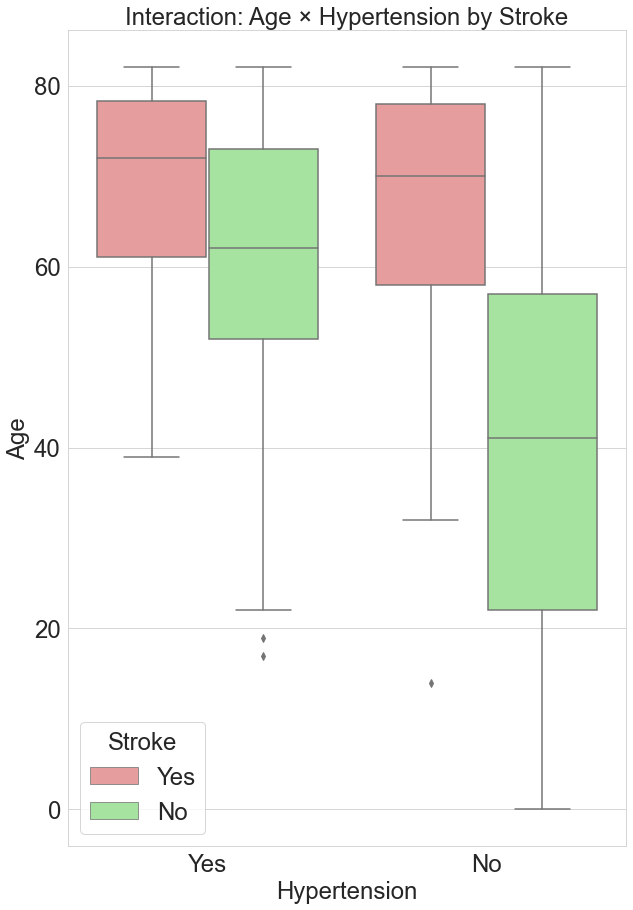

In [197]:
# Define the custom pastel palette
custom_pastel_palette = ["#f29191", "#9ded95"]  # Soft Pink, Pastel Green

# Analyze interaction effects (e.g., Age × Hypertension)
plt.figure(figsize=(10, 15))

# Convert hypertension and stroke columns to string labels
df['hypertension_str'] = df['hypertension'].map({0: 'No', 1: 'Yes'})
df['stroke_str'] = df['stroke'].map({0: 'No', 1: 'Yes'})

# Explicitly set the order of the x-axis categories
sns.boxplot(
    data=df, 
    x='hypertension_str', 
    y='age', 
    hue='stroke_str', 
    palette=custom_pastel_palette, 
    order=["Yes", "No"]  # Ensure "Yes" is on the left
)

# Formatting with increased font sizes
plt.title('Interaction: Age × Hypertension by Stroke', fontsize=24)
plt.xlabel('Hypertension', fontsize=24)
plt.ylabel('Age', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adjust legend font size
plt.legend(title='Stroke', title_fontsize=24, fontsize=24)

plt.show()


# Risk Threshold Analysis

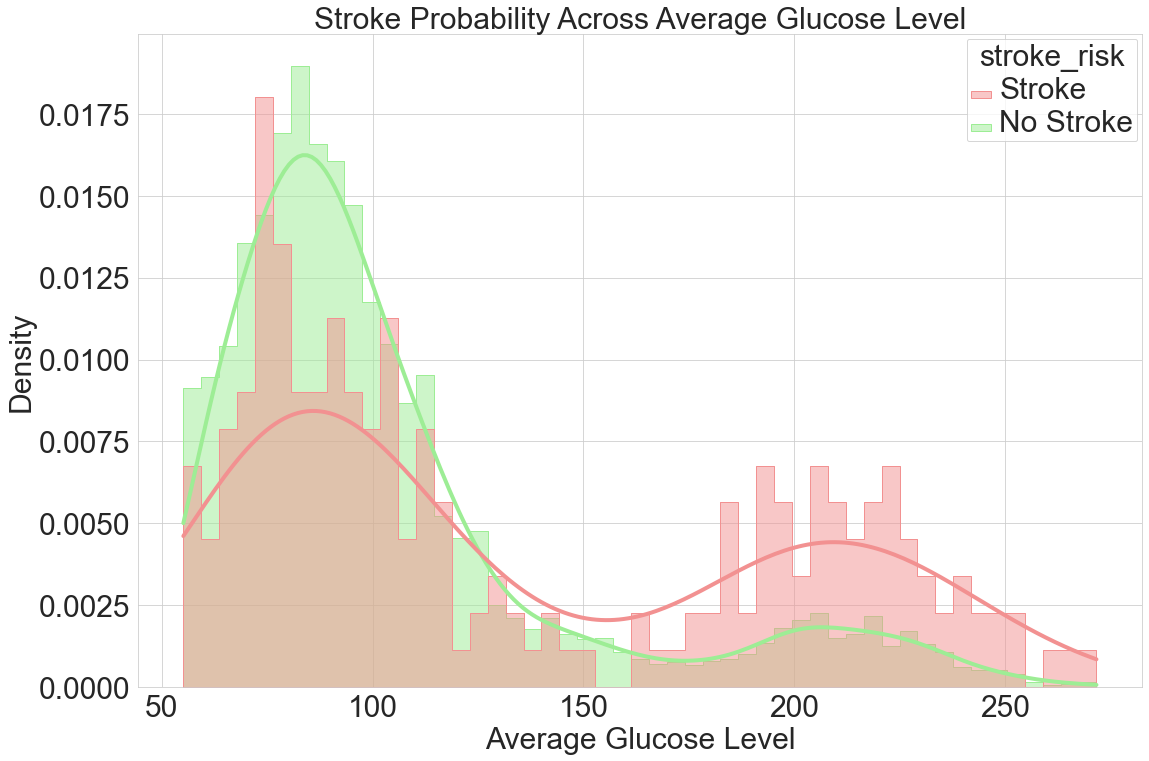

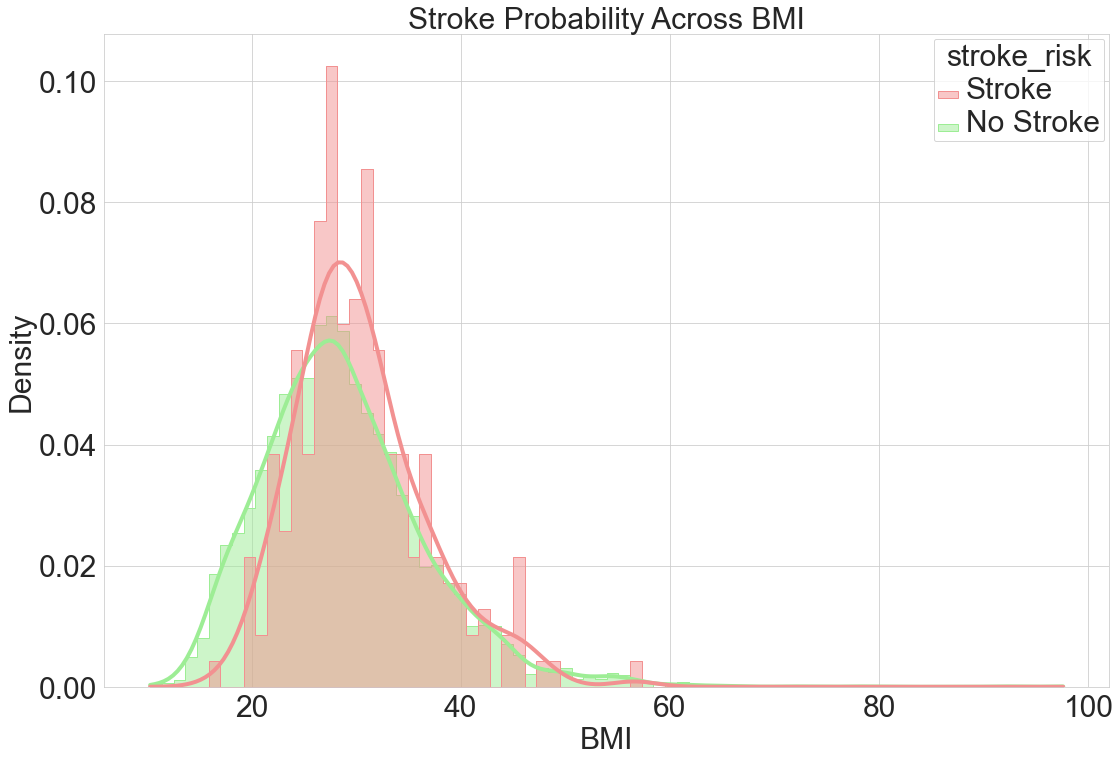

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a mapping from column names to formatted titles
numeric_titles = {
    'avg_glucose_level': 'Average Glucose Level',
    'bmi': 'BMI'
}

# Convert stroke to a categorical variable for proper hue handling
df['stroke_risk'] = df['stroke'].map({0: 'No Stroke', 1: 'Stroke'})  # Rename for clarity

# Define custom colors for "Stroke" and "No Stroke"
custom_palette = {"No Stroke": "#9ded95", "Stroke": "#f29191"}  # Green for No Stroke, Pink for Stroke

# Analyze thresholds for numeric variables
numeric_vars = ['avg_glucose_level', 'bmi']
for var in numeric_vars:
    plt.figure(figsize=(18, 12))

    # Histogram plot with KDE for stroke distribution
    ax = sns.histplot(
        data=df, x=var, hue='stroke_risk', kde=True, element='step', 
        stat='density', common_norm=False, alpha=0.5, palette=custom_palette
    )

    # Adjust KDE line thickness manually
    for line in ax.lines:
        line.set_linewidth(4)  # Make KDE line thicker

    # Custom title based on variable mapping
    plt.title(f'Stroke Probability Across {numeric_titles[var]}', fontsize=30)
    plt.xlabel(numeric_titles[var], fontsize=30)
    plt.ylabel("Density", fontsize=30)

    # Adjust tick label font sizes
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

    # Increase legend font size
    legend = ax.get_legend()
    if legend:
        plt.setp(legend.get_texts(), fontsize=30)  # Set font size for legend labels
        plt.setp(legend.get_title(), fontsize=30)  # Set font size for legend title

    plt.show()
